In [49]:
!pip install yfinance


In [50]:
!pip install --upgrade pip

In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [52]:
class TradingStrategy:
    def __init__(self, symbol, start_date, end_date, capital=10000):
        self.symbol = symbol
        self.start_date = start_date
        self.end_date = end_date
        self.capital = capital
        self.cash = capital
        self.position = None
        self.entry_price = 0
        self.trades = []
    
    def fetch_data(self):
        df = yf.download(self.symbol,start=self.start_date,end=self.end_date)
        df = df.loc[~df.index.duplicated()]
        df.ffill(inplace=True)
        return df
    
    def add_indicators(self,df):
        df['MA50']=df['Close'].rolling(window=50).mean()
        df['MA200']=df['Close'].rolling(window=200).mean()
        return df
    
    def run_strategy(self):
        df = self.fetch_data()
        df = self.add_indicators(df)

        for i in range(1,len(df)):
            if self.position == 0:
                if df['MA50'].iloc[i] > df['MA200'].iloc[i] and \
                   df['MA50'].iloc[i-1] <= df['MA200'].iloc[i-1]:
                    
                
                    price = df['Close'].iloc[i]
                    self.position = self.cash // price
                    self.cash -= self.position * price
                    self.entry_price = price
                    self.trades.append((df.index[i], 'BUY', price))

                else:
                    if df['MA50'].iloc[i] < df['MA200'].iloc[i] and \
                       df['MA50'].iloc[i-1] >= df['MA200'].iloc[i-1]:
                        
                        price = df['Close'].iloc[i]
                        self.cash += self.position * price
                        self.trades.append(("SELL",df.index[i], price))
                        self.position = 0

            # Force Close 

            if self.position > 0:
                price = df['Close'].iloc[-1]
                self.cash += self.position * price
                self.trades.append(("Force SELL",df.index[-1], price))

            return self.cash - self.capital

## Data Download & Cleaning 


## Moving Average Collection

In [53]:
bot = TradingStrategy("AAPL","2020-01-01","2023-01-01")
profit = bot.fetch_data()
print("Total Profit/Loss: ", profit)
print("Trade Log:")

pd.DataFrame(bot.trades, columns=["Action", "Date", "Price"])


[*********************100%***********************]  1 of 1 completed

Total Profit/Loss:  Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.468262   72.528582   71.223259   71.476600  135480400
2020-01-03   71.763733   72.523762   71.539345   71.696175  146322800
2020-01-06   72.335548   72.374154   70.634532   70.885464  118387200
2020-01-07   71.995346   72.600952   71.775781   72.345197  108872000
2020-01-08   73.153481   73.455080   71.698566   71.698566  132079200
...                ...         ...         ...         ...        ...
2022-12-23  129.900299  130.451974  127.713291  128.974267   63814900
2022-12-27  128.097504  129.456999  126.806975  129.427446   69007800
2022-12-28  124.166801  129.082638  123.999330  127.742850   85438400
2022-12-29  127.683754  128.540819  125.831697  126.087827   75703700
2022-12-30  127.998947  128.018654  125.536110  126.501549   77034200


,Action,Date,Price


The strategy did not generate any trades for the selected period because the golden cross condition was not met. This is a valid outcome in rule-based trading systems.

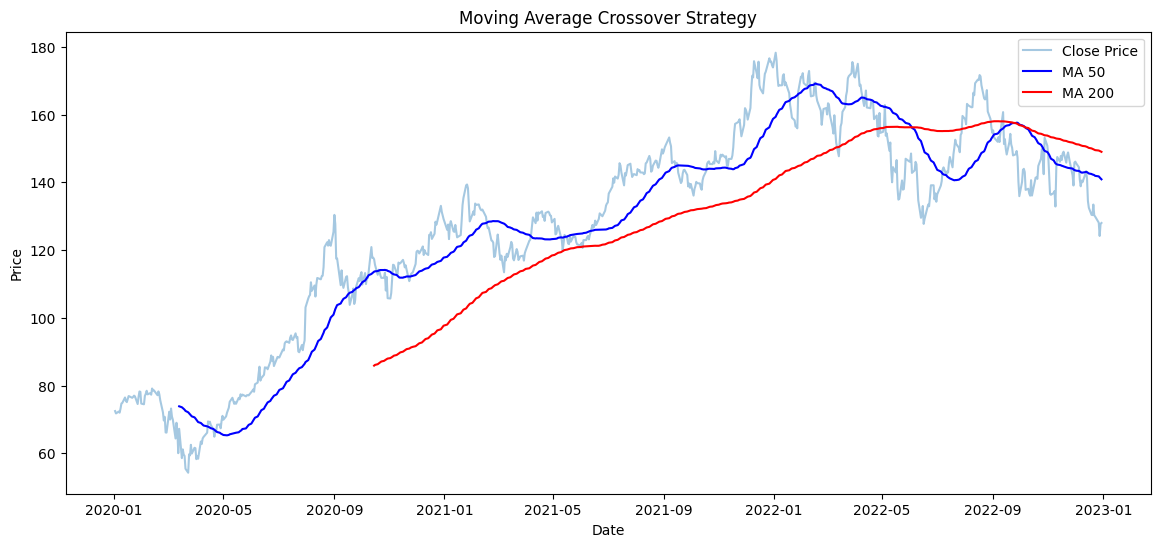

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.plot(df.index, df["Close"], label="Close Price", alpha=0.4)
plt.plot(df.index, df["MA50"], label="MA 50", color="blue")
plt.plot(df.index, df["MA200"], label="MA 200", color="red")

plt.title("Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



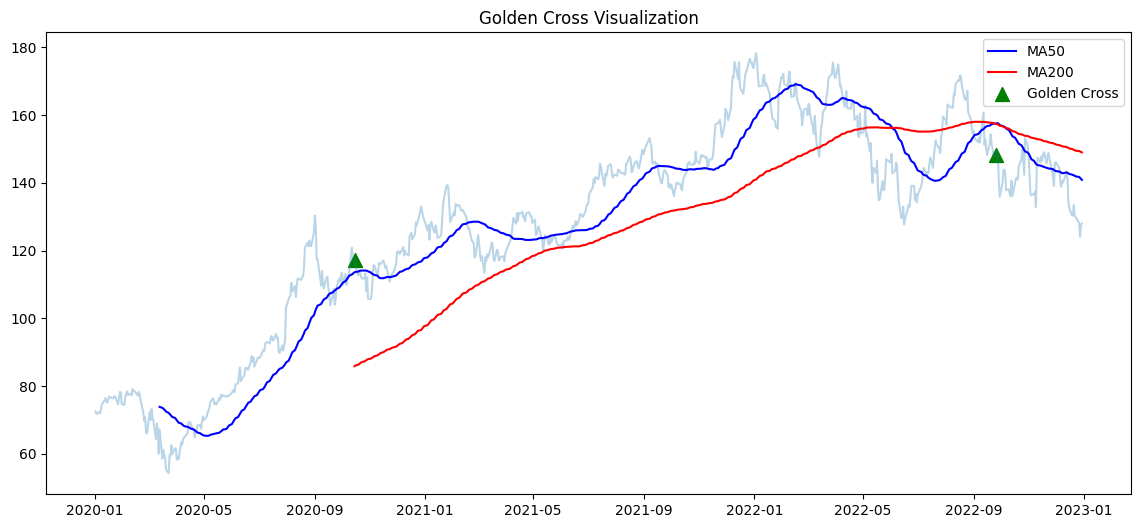

In [57]:
df["Signal"] = 0
df.loc[df["MA50"] > df["MA200"], "Signal"] = 1
df["Crossover"] = df["Signal"].diff()

golden_cross = df[df["Crossover"] == 1]

plt.figure(figsize=(14,6))
plt.plot(df.index, df["Close"], alpha=0.3)
plt.plot(df.index, df["MA50"], label="MA50", color="blue")
plt.plot(df.index, df["MA200"], label="MA200", color="red")

plt.scatter(golden_cross.index,
            golden_cross["Close"],
            color="green",
            label="Golden Cross",
            marker="^",
            s=100)

plt.legend()
plt.title("Golden Cross Visualization")
plt.show()
